In [14]:
%matplotlib inline
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import matplotlib
import datetime
import math
import pandas as pd
from geopy.distance import vincenty
from geopy.geocoders import Nominatim
geolocator = Nominatim()

In [2]:
def get_county(coord):
    from geopy.distance import vincenty
    from geopy.geocoders import Nominatim
    geolocator = Nominatim()
    try:
        address= geolocator.reverse(coord).address
    #print(address)
        address=address.split(',')
    #print(address)
        return [address[len(address)-5], address[len(address)-7]]
    except:
        return ('not available')

In [3]:
def get_county2(coord):
    from pygeocoder import Geocoder
    lat=coord.split(',')[0]
    lat=float(lat)
    long=coord.split(',')[1]
    long=float(long)
    try:
        return Geocoder.reverse_geocode(lat,long).administrative_area_level_2
    except:
        return ('not available')

In [4]:
def get_neigh(coord):
    from geopy.distance import vincenty
    from geopy.geocoders import Nominatim
    geolocator = Nominatim()
    try:
        address= geolocator.reverse(coord).address
        address=address.split(',')
        return address[len(address)-7]
    except:
        return ('not available')

In [5]:
def get_closest_subdist(coord):
    df_subdata=pd.read_csv('DOITT_SUBWAY_STATION_01_13SEPT2010.csv')
    df_subdata['coords']=df_subdata['the_geom'].str.split(' ').str.get(2).str.split(')').str.get(0)+','+df_subdata['the_geom'].str.split(' ').str.get(1).str.split('(').str.get(1)
    list_subs=list(df_subdata['coords'])
    min_dist=3000000 #meters
    for i in list_subs:
        if vincenty(coord, i).m <min_dist:
            min_dist=vincenty(coord, i).m
    return min_dist

In [6]:
%matplotlib inline
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import datetime
import math
import pandas as pd
from geopy.distance import vincenty
from geopy.geocoders import Nominatim
geolocator = Nominatim()
#
df_entire=pd.read_json('train2.json') # load entire data set
df=df_entire.sample(frac=0.2) # sample 10% data
#
df['price_scaled']=df['price']/(df['bedrooms']+df['bathrooms'])
df['GeoC']=df['latitude'].astype(str)+','+df['longitude'].astype(str)
df['county_neigh']=df['GeoC'].apply(get_county)
#df['neigh']=df['GeoC'].apply(get_neigh)
df['cl_sub']=df['GeoC'].apply(get_closest_subdist)
df.to_json('Rental_data_sample_10per.json')
#

In [2]:
df=pd.read_json('Rental_data_sample_10per.json')

In [3]:
df['county']=df['county_neigh'].apply(lambda x: x[0])
df['neigh']=df['county_neigh'].apply(lambda x: x[1])
df['price_scaled']=df['price']/(df['bedrooms']+df['bathrooms']) # scaled by total number of rooms
df['price_scaled2']=df['price']/(df['cl_sub']*df['bathrooms']) # scaled by distance to closest subway and number of bathrooms

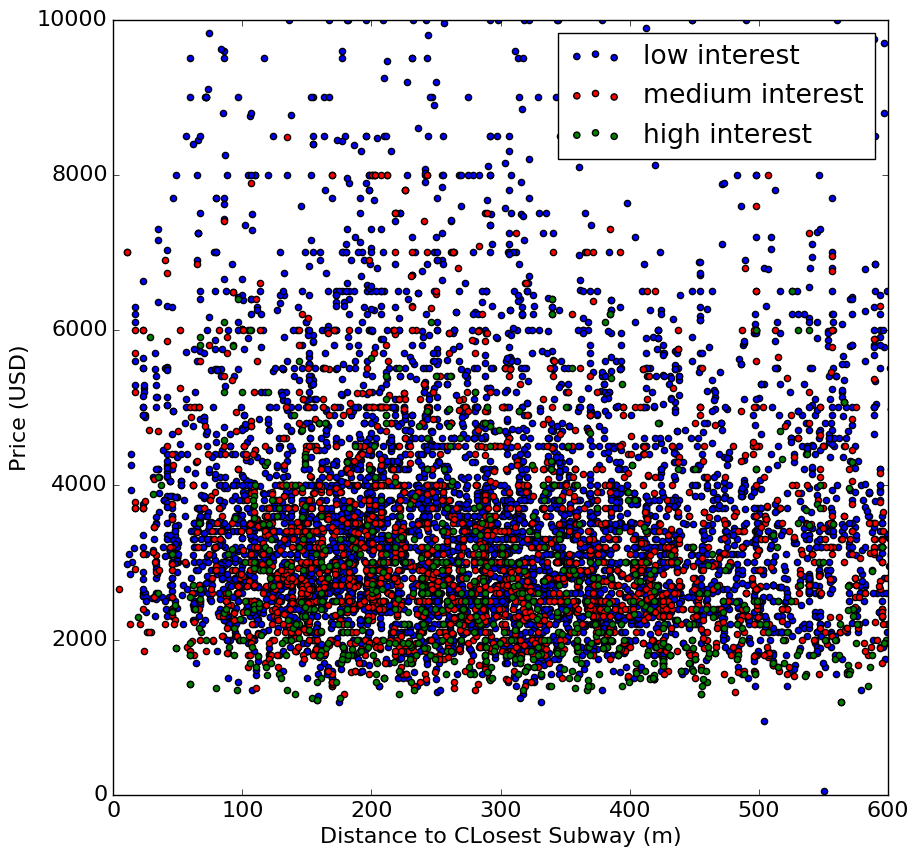

In [39]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)
ax=df[(df['interest_level']=='low')].plot(kind='scatter', x='cl_sub', y='price',color='Blue', label='low interest',figsize=(10,10),xlim=(0,600),ylim=(0,10000))
df[(df['interest_level']=='medium')].plot(kind='scatter',ax=ax, x='cl_sub', y='price',color='Red', label='medium interest',figsize=(10,10),xlim=(0,600),ylim=(0,10000))#,xlim=(150,600),ylim=(-10,100))
df[(df['interest_level']=='high')].plot(kind='scatter', x='cl_sub', y='price',color='Green', label='high interest',ax=ax,figsize=(10,10),xlim=(0,600),ylim=(0,10000))#,xlim=(150,600),ylim=(-10,100))
ax.set_xlabel('Distance to CLosest Subway (m)')
ax.set_ylabel('Price (USD)')
fig = ax.get_figure()
fig.savefig('Price vs Distance to closest Subway.png')

In [42]:
#df_NYC_bb=df_NYC[(df_NYC['bedrooms']>0)&(df_NYC['bathrooms']>0)]
df_bb=df[(df['bathrooms']>0)]

In [47]:
df_bb['price_scaled']=df_bb.apply(lambda x:x['price']/(x['bathrooms']+x['bedrooms']),axis=1)
df_bb['price_scaled2']=df_bb.apply(lambda x:x['price_scaled']/x['cl_sub'],axis=1)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


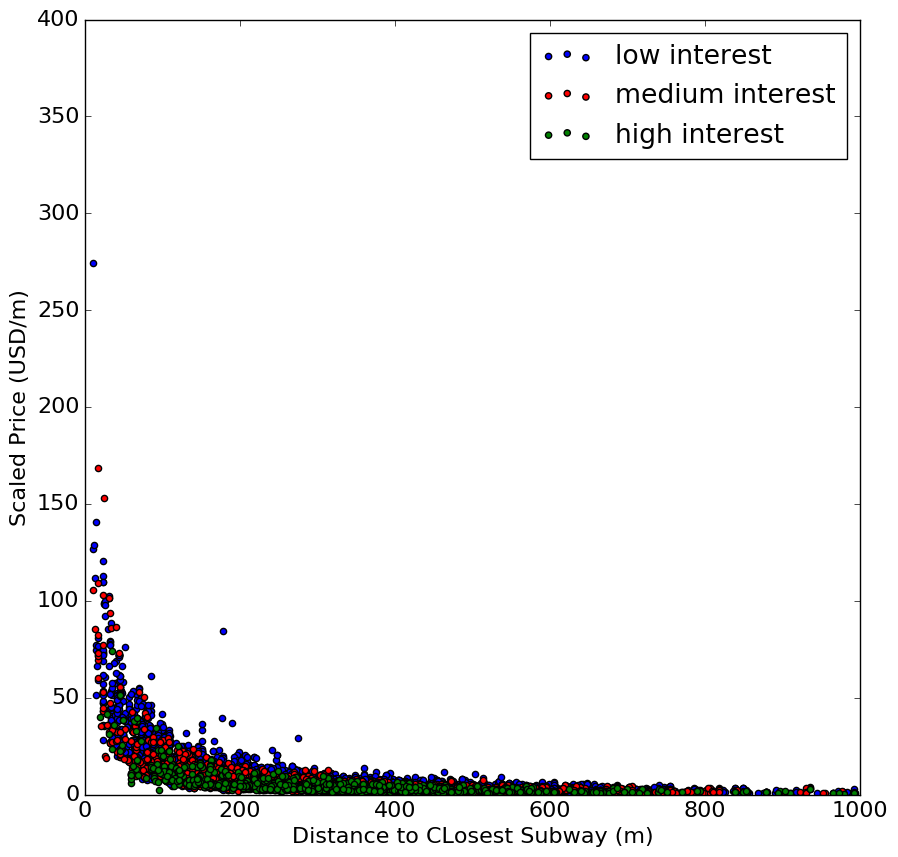

In [48]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
ax=df_bb[(df_bb['interest_level']=='low')].plot(kind='scatter', x='cl_sub', y='price_scaled2',color='Blue', label='low interest',figsize=(10,10),xlim=(0,1000),ylim=(0,400))#,logy=1,logx=1)
df_bb[(df_bb['interest_level']=='medium')].plot(kind='scatter',ax=ax, x='cl_sub', y='price_scaled2',color='Red', label='medium interest',figsize=(10,10),xlim=(0,1000),ylim=(0,400))#,logy=1,logx=1)
df_bb[(df_bb['interest_level']=='high')].plot(kind='scatter', ax=ax,x='cl_sub', y='price_scaled2',color='Green', label='high interest',figsize=(10,10),xlim=(0,1000),ylim=(0,400))#,logy=1,logx=1)
ax.set_xlabel('Distance to CLosest Subway (m)')
ax.set_ylabel('Scaled Price (USD/m)')
fig = ax.get_figure()
fig.savefig('Scaled Price vs Distance to closest Subway.png')

//anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


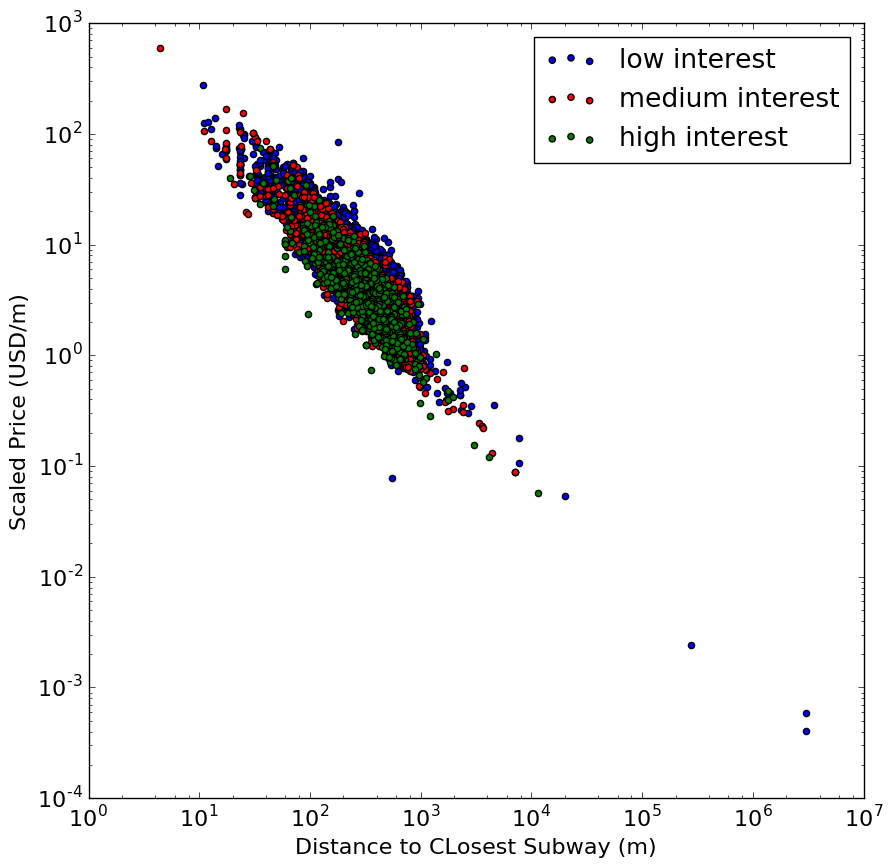

In [49]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
ax=df_bb[(df_bb['interest_level']=='low')].plot(kind='scatter', x='cl_sub', y='price_scaled2',color='Blue', label='low interest',figsize=(10,10),logy=1,logx=1)
df_bb[(df_bb['interest_level']=='medium')].plot(kind='scatter',ax=ax, x='cl_sub', y='price_scaled2',color='Red', label='medium interest',figsize=(10,10),logy=1,logx=1)
df_bb[(df_bb['interest_level']=='high')].plot(kind='scatter', ax=ax,x='cl_sub', y='price_scaled2',color='Green', label='high interest',figsize=(10,10),logy=1,logx=1)
ax.set_xlabel('Distance to CLosest Subway (m)')
ax.set_ylabel('Scaled Price (USD/m)')
fig = ax.get_figure()
fig.savefig('Scaled Price vs Distance to closest Subway (log-log plot).png')